In [1]:
import acquire
import evaluate
import split_scale
import features

In [34]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

## 1 ACQUIRE Section

In [3]:
df = acquire.get_zillow_data()

In [4]:
df.columns

Index(['id', 'bathrooms', 'bedrooms', 'sq_ft', 'taxvaluedollarcnt',
       'lotsizesquarefeet'],
      dtype='object')

In [20]:
df = df.dropna()

In [6]:
#Making the id be the index
df = df.set_index(['id'])

In [22]:
df.shape


(15956, 5)

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


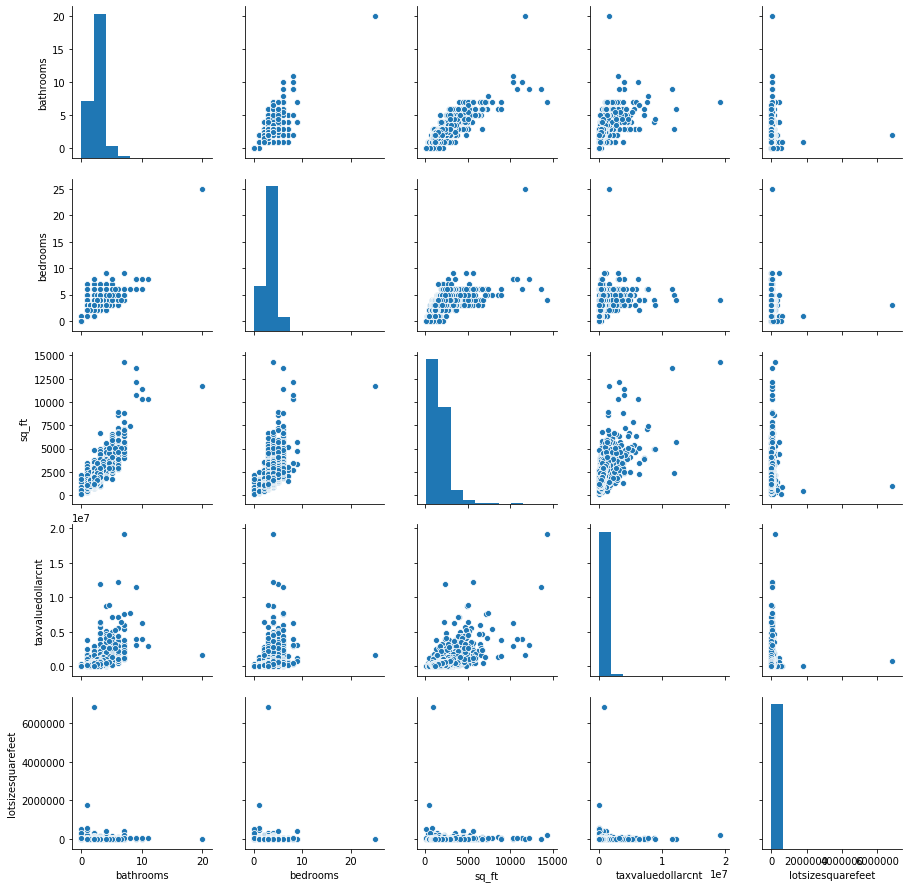

In [8]:
sns.pairplot(data=df.head(7000))

# HERE'S WHAT WE GOT:
### df the DataFrame that is 9 columns wide and 16035 records long.
### explicit index (loc) is the id from the DB
### Each row is a house from the table that had a transaction in MAY or JUNE of 2017

# 2 PREP

In [ ]:
## Lets look at Sara's stuff


## 3 SPLIT-SCALE Section

In [23]:
train, test = split_scale.split_my_data(df)

In [24]:
train.head()
train.shape

(12764, 5)

In [25]:
test.shape

(3192, 5)

In [26]:
scaler, train_scaled, test_scaled = split_scale.standard_scaler(train, test)

In [27]:
y_train=train[['taxvaluedollarcnt']]
X_train=train_scaled.drop('taxvaluedollarcnt' ,axis=1)

In [28]:
y_test=test[['taxvaluedollarcnt']]
X_test=test_scaled.drop('taxvaluedollarcnt',axis=1)

## 4 FEATURE SELECTION

In [31]:
#This will use RFE to whittle down to the optimal amount of featues.
#Too many and you'll definitely overfit
optimal_n_of_features = features.optimal_number_of_features(X_train, y_train, X_test, y_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
#So we know 3 is the amount of features to use. Given our x_train feature matrix.
best_features = features.optimal_features(X_train, y_train, 3)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 5 MODELING AND EVALUATION

In [ ]:
#WE"RE GONNA MAKE TWO Lin-Reg MODELS
#ONE TRAINED WITH EVERY FEATURE, ONE WITH THE 3 OPTIMAL FEATURES

#model_1 will be the baseline, with all the features
model_1=LinearRegression()
model_1.fit(X_train,y_train)

#model_1 is now ready to make some predictions on the feature matrix it was created from
#(X_train)

In [38]:
y_hat_1=model_1.predict(X_train)

In [47]:
mse1, rmse1, r_squared1 = evaluate.regression_errors(y_train, y_hat_1)

In [41]:
r_squared

array([[0.43793937]])

In [44]:
#model_2 will only use the 3 features picked by our RFE functions
best_features
X_train_optimo = X_train[best_features]

In [45]:
model_2=LinearRegression()
model_2.fit(X_train_optimo,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_hat_2=model_2.predict(X_train_optimo)

In [62]:
mse2, rmse2, r_squared2 = evaluate.regression_errors(y_train, y_hat_2)

In [70]:
r_squared2

array([[0.43792448]])

In [64]:
X_train.head()

,bathrooms,bedrooms,sq_ft,lotsizesquarefeet
36066,3.711707,1.825258,3.033383,-0.013324
46689,0.780796,-0.252751,0.842440,-0.039519
45775,0.780796,0.786254,0.493550,-0.062700
33616,-0.196175,0.786254,-0.647609,-0.070971
51256,-0.196175,-0.252751,-0.293528,-0.112373


In [65]:
X_train_optimo.head()

,bathrooms,bedrooms,sq_ft
36066,3.711707,1.825258,3.033383
46689,0.780796,-0.252751,0.842440
45775,0.780796,0.786254,0.493550
33616,-0.196175,0.786254,-0.647609
51256,-0.196175,-0.252751,-0.293528


In [66]:
mse1

(taxvaluedollarcnt    2.281878e+11
 dtype: float64,)

In [67]:
mse2

(taxvaluedollarcnt    2.281939e+11
 dtype: float64,)

In [68]:
rmse1

(477690.1183985047,)

In [69]:
rmse2

(477696.44554809143,)